<a href="https://colab.research.google.com/github/01fe21bec366/python/blob/main/Q4%20classic%20ml%20program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.00%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


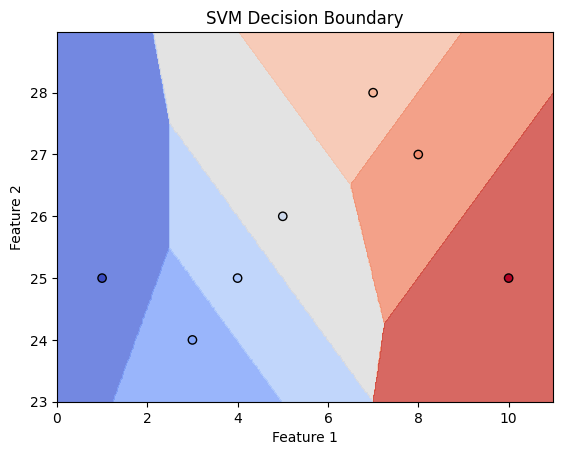

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  # Import Pandas
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load your dataset from a CSV file using pd.read_csv
# Replace "your_dataset.csv" with the actual path to your CSV file
data = pd.read_csv("/content/new1.csv")

# Assuming your dataset has a 'target' column for classification
X = data.drop(columns=['salary'])  # Features
y = data['experience']  # Target variable

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an SVM classifier
clf = SVC(kernel='linear', C=1)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Visualize the decision boundary
def plot_decision_boundary(X, y, classifier):
    h = 0.02  # Step size in the mesh
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundary')
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X_train, y_train, clf)

In [10]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.inspection import DecisionBoundaryDisplay

# Read the data from an Excel sheet
data = pd.read_csv('/content/svm (1).csv')

# Split the data into features (X) and labels (y)
X = data[['X1', 'X2']]
y = data['y']  # Replace 'Label_column' with the actual name of your label column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier (you can choose the kernel and other hyperparameters)
clf = SVC(kernel='linear')

# Train the SVM classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
# Plot Decision Boundary
DecisionBoundaryDisplay.from_estimator(
    clf,
    X.values,
    response_method="predict",
    cmap=plt.cm.Spectral,
    alpha=0.8,
    xlabel='X1',
    ylabel='X2',
)

# Scatter plot
plt.scatter(X['X1'], X['X2'], c=y, s=20, edgecolors="k")
plt.show()


KeyError: ignored

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Load your dataset from a CSV file using pd.read_csv
# Replace "your_dataset.csv" with the actual path to your CSV file
data = pd.read_csv("/content/new1.csv")

# Assuming your dataset has a 'target' column for classification
X = data.drop(columns=['salary'])  # Features
y = data['experience']  # Target variable

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier on the training data
gnb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gnb.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=gnb.classes_, yticklabels=gnb.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

FileNotFoundError: ignored

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Load your dataset from a CSV file using pd.read_csv
# Replace "your_dataset.csv" with the actual path to your CSV file
data = pd.read_csv("/content/new1.csv")

# Assuming your dataset has a 'target' column for classification
X = data.drop(columns=['salary'])  # Features
y = data['experience']  # Target variable

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Get feature importances
importances = rf_classifier.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
indices = importances.argsort()[::-1]
sorted_importances = [importances[i] for i in indices]
sorted_feature_names = [feature_names[i] for i in indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), sorted_importances, tick_label=sorted_feature_names)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances in Random Forest Classifier')
plt.tight_layout()
plt.show()

FileNotFoundError: ignored

In [ ]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Load your dataset from a CSV file using pd.read_csv
# Replace "your_dataset.csv" with the actual path to your CSV file
data = pd.read_csv("/content/new1.csv")

# Assuming your dataset has a 'target' column for classification
X = data.drop(columns=['salary'])  # Features
y = data['experience']  # Target variable

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict probabilities for each class
y_probs = rf_classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
n_classes = len(rf_classifier.classes_)
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {i}')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class')
plt.legend(loc="lower right")
plt.show()

FileNotFoundError: ignored

In [ ]:

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# Load your dataset from a CSV file using pd.read_csv
# Replace "your_dataset.csv" with the actual path to your CSV file
data = pd.read_csv("/content/new1.csv")

# Assuming your dataset has a 'target' column for classification
X = data.drop(columns=['salary'])  # Features
y = data['experience']  # Target variable

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Plot the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=list(map(str, dt_classifier.classes_)))
plt.title('Decision Tree Classifier')
plt.show()


FileNotFoundError: ignored